## **HATE SPEECH DETECTION ON TELEGRAM**

**PROBLEM** **STATEMENT**: In recent times, the rise of online communication platforms has resulted in an increase in hate speech, which can cause serious harm to people and communities. Telegram, a widely-used messaging app, is also affected by this issue. Hate speech on Telegram can appear in different ways, including offensive language, discrimination, threats, and encouraging violence. It is very important to detect and address hate speech quickly to ensure that Telegram remains a safe and respectful place for everyone to communicate.

**SOLUTION** **DESCRIPTION**:
To address the problem of hate speech on Telegram, we are leveraging the power of BERT tokenization and embeddings in combination with a deep learning model featuring three BiLSTM layers. Our approach begins with collecting a comprehensive dataset of Telegram messages that are labeled as either hate speech or non-hate speech. We then clean and preprocess this text data to remove special characters, handle emojis, and normalize the text for better processing.


The core of our solution involves using the BERT tokenizer to convert these messages into token IDs, These tokenized messages are then passed through a pre-trained BERT model to obtain rich, contextual embeddings that capture the semantic relationships between the words in each message.

These BERT embeddings are subsequently fed into a neural network comprising three Bidirectional Long Short-Term Memory (BiLSTM) layers. These layers are adept at capturing long-range dependencies in text data from both forward and backward directions, allowing our model to understand the nuanced patterns and context in the messages more effectively.

The final layer of our model is a dense layer with a sigmoid activation function, which classifies the messages as hate speech or non-hate speech. We train our model using a balanced approach to ensure it learns effectively from both categories, and we evaluate its performance with key metric Recall.

**DATASET** **DESCRIPTION**:
The GHC (Gab Hate Corpus) dataset is a comprehensive collection of posts from Gab, a social media platform known for its lenient moderation policies, which has been associated with a high incidence of hate speech. The dataset is specifically curated for hate speech detection research and contains a total of 22,037 posts. Each post is meticulously annotated, not only for the presence of hate speech but also with additional columns that provide valuable insights into different aspects of the content. These columns include 'hd' for Human Dignity, 'cv' for Calls for Violence, and 'vo' for Vulgarity/Offensive Language directed at an individual. This detailed annotation makes the GHC dataset an essential resource for developing and refining automated systems to identify and mitigate hate speech in online platforms.


# **DATA** **VISUALISATION**

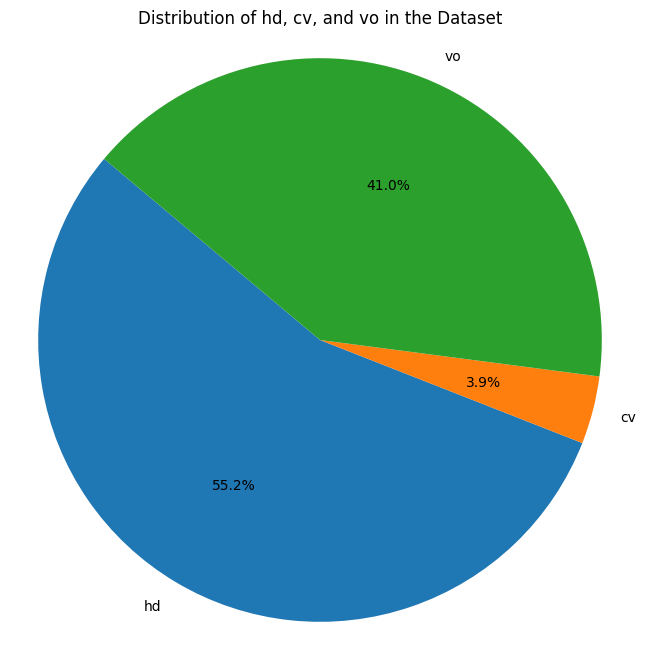

In [34]:
#Distribution of metadata

Training set size: 13936
Validation set size: 3484
Test set size: 4356


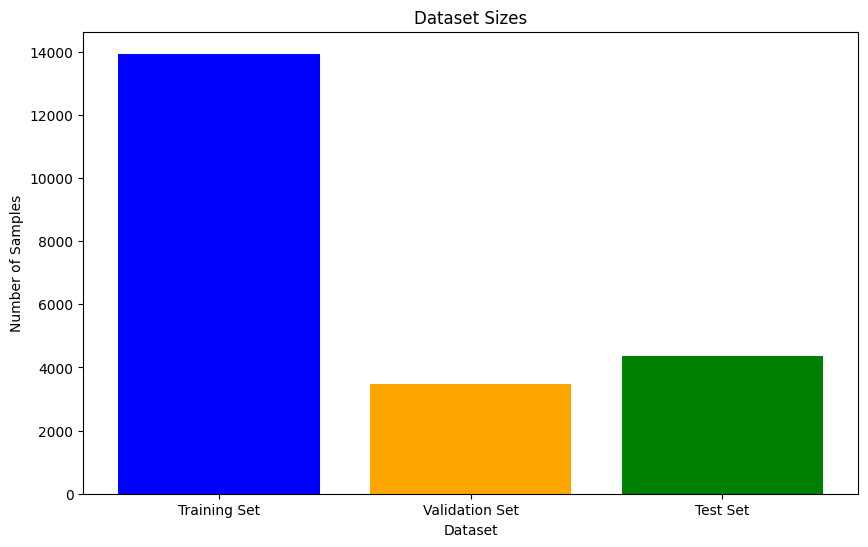

In [9]:
# Sizes of each dataset

Label Distribution in Train Set:
Label 0: 12240 samples
Label 1: 1696 samples


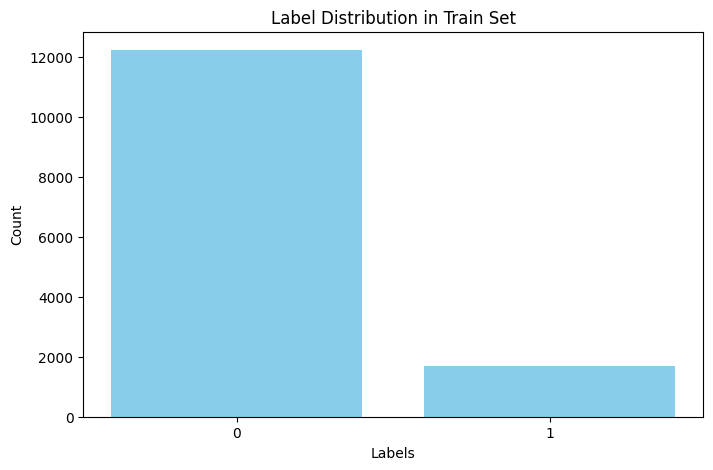

In [14]:
#label wise split in train data

# **FINAL DEEP LEARNING MODEL**

# **Bert With LSTM**

**Confusion** **metric** **and** **classification** **Chart**

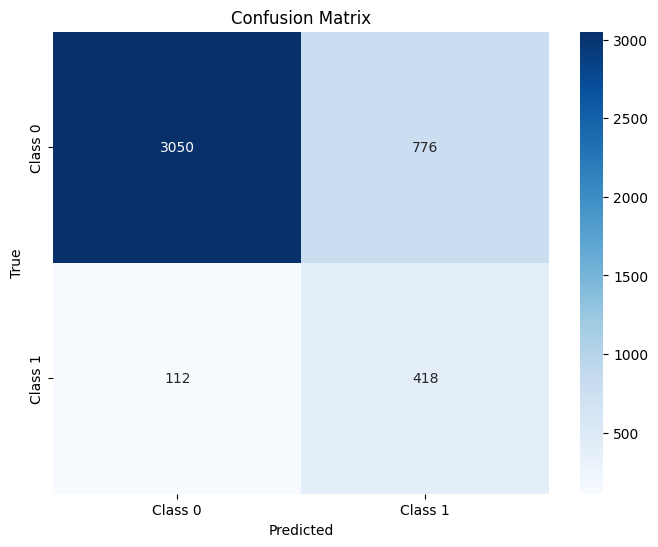

              precision    recall  f1-score   support

     Class 0       0.96      0.80      0.87      3826
     Class 1       0.35      0.79      0.48       530

    accuracy                           0.80      4356
   macro avg       0.66      0.79      0.68      4356
weighted avg       0.89      0.80      0.83      4356



In [ ]:
# CONFUSION METRIC & CLASSIFICATION CHART OF THE BEST MODEL i.e BERT with LSTM

# **PREDICTION OF THE TEXT**

In [ ]:
def predict_hate_speech_multiple(sentences, tokenizer, bert_model, trained_model, max_length=50, batch_size=16):
    Tokenize and encode the input sentences
    encodings = tokenizer(
        sentences,
        truncation=True,
        padding='max_length',
        max_length=max_length,
        return_tensors='tf'
    )

    #Extract BERT embeddings for the input sentences
    embeddings = []
    for i in range(0, len(encodings['input_ids']), batch_size):
        batch_encodings = {key: val[i:i+batch_size] for key, val in encodings.items()}
        batch_embeddings = get_bert_embeddings(batch_encodings, bert_model)
        embeddings.append(batch_embeddings)
    embeddings = tf.concat(embeddings, axis=0)

    # : Use the trained model to predict the labels
    predictions = trained_model.predict(embeddings)
    predicted_classes = (predictions > 0.5).astype("int32")

    # Map predictions to labels
    labels = ["Hate Speech" if cls == 1 else "Not Hate Speech" for cls in predicted_classes]

    return labels

# Example usage
input_sentences = [
    "saudi money rules the youk while zionist money runs the eyou we are in the middle of a shit sandwich",
    "imagine how many famous people may not have existed if abortions had always been so available ",
    "see how this works there isnt anything more fucked up than this i think its time to really throw every single one of the motherfuckers out and begin fresh"
]
predictions = predict_hate_speech_multiple(input_sentences, tokenizer, bert_model, model)
for sentence, prediction in zip(input_sentences, predictions):
    print(f"Sentence: '{sentence}' is classified as: {prediction}")


1/1 [==============================] - 0s 103ms/step
Sentence: 'saudi money rules the youk while zionist money runs the eyou we are in the middle of a shit sandwich' is classified as: Hate Speech
Sentence: 'imagine how many famous people may not have existed if abortions had always been so available ' is classified as: Not Hate Speech
Sentence: 'see how this works there isnt anything more fucked up than this i think its time to really throw every single one of the motherfuckers out and begin fresh' is classified as: Hate Speech
